# MNIST - Numbers Identification

## Importing Libraries and Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

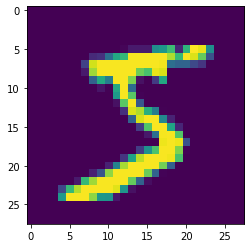

In [5]:
image=x_train[0]
plt.imshow(image)

## Data Preprocessing

### Converting Target Variable

In [6]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

### Scaling and Reshaping Data

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

## Model Creation and Training

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [14]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),callbacks=[early_stop],epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1362 - accuracy: 0.9592 - val_loss: 0.0486 - val_accuracy: 0.9843
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0401 - val_accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0295 - accuracy: 0.9903 - val_loss: 0.0372 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0189 - accuracy: 0.9942 - val_loss: 0.0407 - val_accuracy: 0.9873


In [15]:
metrics = pd.DataFrame(model.history.history)

In [16]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.136193,0.959217,0.048571,0.9843
1,0.045788,0.985600,0.040085,0.9874
2,0.029537,0.990317,0.037216,0.9883
3,0.018864,0.994233,0.040715,0.9873


## Visualising Model Performance

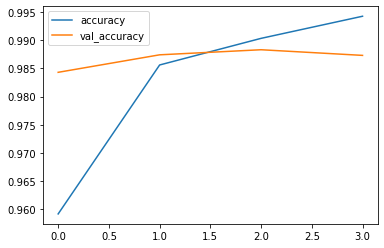

In [17]:
metrics[['accuracy','val_accuracy']].plot()

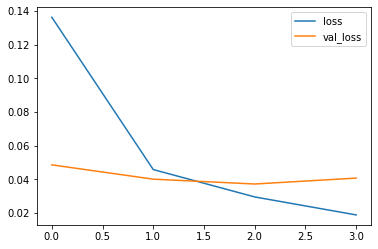

In [18]:
metrics[['loss','val_loss']].plot()

## Saving Model

In [19]:
model.save('MNIST.h5')